In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [3]:
df = pd.read_csv('HousingData.csv')
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,NaN,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


In [4]:
df.shape

(506, 14)

In [5]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2


In [6]:
df.tail()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,NaN,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0
505,0.04741,0.0,11.93,0.0,0.573,6.030,NaN,2.5050,1,273,21.0,396.90,7.88,11.9


In [7]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,486.000000,486.000000,486.000000,486.000000,506.000000,506.000000,486.000000,506.000000,506.000000,506.000000,506.000000,506.000000,486.000000,506.000000
mean,3.611874,11.211934,11.083992,0.069959,0.554695,6.284634,68.518519,3.795043,9.549407,408.237154,18.455534,356.674032,12.715432,22.532806
std,8.720192,23.388876,6.835896,0.255340,0.115878,0.702617,27.999513,2.105710,8.707259,168.537116,2.164946,91.294864,7.155871,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.081900,0.000000,5.190000,0.000000,0.449000,5.885500,45.175000,2.100175,4.000000,279.000000,17.400000,375.377500,7.125000,17.025000
50%,0.253715,0.000000,9.690000,0.000000,0.538000,6.208500,76.800000,3.207450,5.000000,330.000000,19.050000,391.440000,11.430000,21.200000
75%,3.560263,12.500000,18.100000,0.000000,0.624000,6.623500,93.975000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [8]:
df.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'MEDV'],
      dtype='object')

In [9]:
df.isnull().sum()

CRIM       20
ZN         20
INDUS      20
CHAS       20
NOX         0
RM          0
AGE        20
DIS         0
RAD         0
TAX         0
PTRATIO     0
B           0
LSTAT      20
MEDV        0
dtype: int64

In [ ]:
df=df.fillna(df.mean())

In [12]:
df.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

In [14]:
corr = df.corr()
corr

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
CRIM,1.000000,-0.182930,0.391161,-0.052223,0.410377,-0.215434,0.344934,-0.366523,0.608886,0.566528,0.273384,-0.370163,0.434044,-0.379695
ZN,-0.182930,1.000000,-0.513336,-0.036147,-0.502287,0.316550,-0.541274,0.638388,-0.306316,-0.308334,-0.403085,0.167431,-0.407549,0.365943
INDUS,0.391161,-0.513336,1.000000,0.058035,0.740965,-0.381457,0.614592,-0.699639,0.593176,0.716062,0.384806,-0.354597,0.567354,-0.478657
CHAS,-0.052223,-0.036147,0.058035,1.000000,0.073286,0.102284,0.075206,-0.091680,0.001425,-0.031483,-0.109310,0.050055,-0.046166,0.179882
NOX,0.410377,-0.502287,0.740965,0.073286,1.000000,-0.302188,0.711461,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.572379,-0.427321
RM,-0.215434,0.316550,-0.381457,0.102284,-0.302188,1.000000,-0.241351,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.602962,0.695360
AGE,0.344934,-0.541274,0.614592,0.075206,0.711461,-0.241351,1.000000,-0.724353,0.449989,0.500589,0.262723,-0.265282,0.574893,-0.380223
DIS,-0.366523,0.638388,-0.699639,-0.091680,-0.769230,0.205246,-0.724353,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.483429,0.249929
RAD,0.608886,-0.306316,0.593176,0.001425,0.611441,-0.209847,0.449989,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.468440,-0.381626
TAX,0.566528,-0.308334,0.716062,-0.031483,0.668023,-0.292048,0.500589,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.524545,-0.468536


In [19]:
x = df.iloc[:, 0:13]
y = df.iloc[:, 13]

In [20]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [21]:
print(x_train)

         CRIM         ZN  INDUS  CHAS     NOX     RM        AGE     DIS  RAD  \
477  15.02340   0.000000  18.10   0.0  0.6140  5.304  97.300000  2.1007   24   
15    0.62739   0.000000   8.14   0.0  0.5380  5.834  56.500000  4.4986    4   
332   0.03466  11.211934   6.06   0.0  0.4379  6.031  23.300000  6.6407    1   
423   7.05042   0.000000  18.10   0.0  0.6140  6.103  68.518519  2.0218   24   
19    0.72580   0.000000   8.14   0.0  0.5380  5.727  69.500000  3.7965    4   
..        ...        ...    ...   ...     ...    ...        ...     ...  ...   
106   0.17120   0.000000   8.56   0.0  0.5200  5.836  91.900000  2.2110    5   
270   0.29916  20.000000   6.96   0.0  0.4640  5.856  42.100000  4.4290    3   
348   0.01501  80.000000   2.01   0.0  0.4350  6.635  29.700000  8.3440    4   
435  11.16040   0.000000  18.10   0.0  0.7400  6.629  94.600000  2.1247   24   
102   0.22876   0.000000   8.56   0.0  0.5200  6.405  85.400000  2.7147    5   

     TAX  PTRATIO       B  LSTAT  
477 

In [22]:
x_train.shape

(404, 13)

In [23]:
print(x_test)

         CRIM    ZN      INDUS  CHAS    NOX     RM         AGE     DIS  RAD  \
173   0.09178   0.0  11.083992   0.0  0.510  6.416   68.518519  2.6463    5   
274   0.05644  40.0   6.410000   1.0  0.447  6.758   32.900000  4.0776    4   
491   0.10574   0.0  27.740000   0.0  0.609  5.983   98.800000  1.8681    4   
72    0.09164   0.0  10.810000   0.0  0.413  6.065    7.800000  5.2873    4   
452   5.09017   0.0  18.100000   0.0  0.713  6.297   91.800000  2.3682   24   
..        ...   ...        ...   ...    ...    ...         ...     ...  ...   
412  18.81100   0.0  18.100000   0.0  0.597  4.628  100.000000  1.5539   24   
436  14.42080   0.0  18.100000   0.0  0.740  6.461   93.300000  2.0026   24   
411  14.05070   0.0  18.100000   0.0  0.597  6.657  100.000000  1.5275   24   
86    0.05188   0.0   4.490000   0.0  0.449  6.015   45.100000  4.4272    3   
75    0.09512   0.0  12.830000   0.0  0.437  6.286   45.000000  4.5026    5   

     TAX  PTRATIO       B  LSTAT  
173  296     16.

In [24]:
print(y_train)

477    12.0
15     19.9
332    19.4
423    13.4
19     18.2
       ... 
106    19.5
270    21.1
348    24.5
435    13.4
102    18.6
Name: MEDV, Length: 404, dtype: float64


In [25]:
print(y_test)

173    23.6
274    32.4
491    13.6
72     22.8
452    16.1
       ... 
412    17.9
436     9.6
411    17.2
86     22.5
75     21.4
Name: MEDV, Length: 102, dtype: float64


In [16]:
corr_matrix = df.corr()

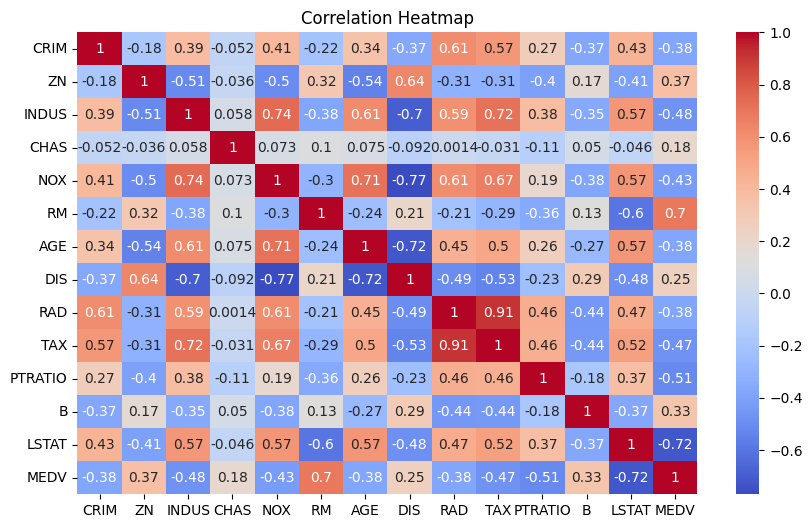

In [17]:
plt.figure(figsize=(10,6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [26]:
x_train = x_train.dropna()
y_train = y_train.loc[x_train.index]

In [27]:
linear_regression = LinearRegression()
linear_regression.fit(x_train, y_train)
# y_pred = linear_regression.predict(x_test)

LinearRegression()

In [28]:
pd.DataFrame(x_test).isna().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
dtype: int64

In [30]:
ypred = linear_regression.predict(x_test)
mse = mean_squared_error(y_test, ypred)
mae = mean_absolute_error(y_test,ypred)
print("Mean Square Error : ", mse)
print("Mean Absolute Error : ", mae)

Mean Square Error :  25.017672023842703
Mean Absolute Error :  3.149923357345782


In [32]:
r2 = r2_score(y_test, ypred)
r2

0.658852019550814